In [1]:
import numpy as np
import matplotlib as plt

#_________Rules_______________:
#R1   Q=cA
def rule1(dA,c):
    return c*dA
#R2   Q=cA^m
def rule2(A,dA,m,c):
    return c*m*(A**(m-1))*dA
#R3   Q=A+B or A-B
def rule3(dA,dB):
    dQ = np.sqrt(dA**2 + dB**2)
    return dQ
#R4   Q=cA^mB^n
def rule4(Q,A,dA,m,B,dB,n):
    s = ((m*dA/A)**2)+((n*dB/B)**2)
    return Q*np.sqrt(s)
#R4+  Q=cA^mB^nC^o
def rule4plus(Q,A,dA,m,B,dB,n,C,dC,o):
    s = ((m*dA/A)**2)+((n*dB/B)**2)+((o*dC/C)**2)
    return Q*np.sqrt(s)

In [5]:
#Data collection


dtheta=1

err=np.sin(np.deg2rad(30+dtheta))-np.sin(np.deg2rad(30))


print(err)

0.015038074910054211


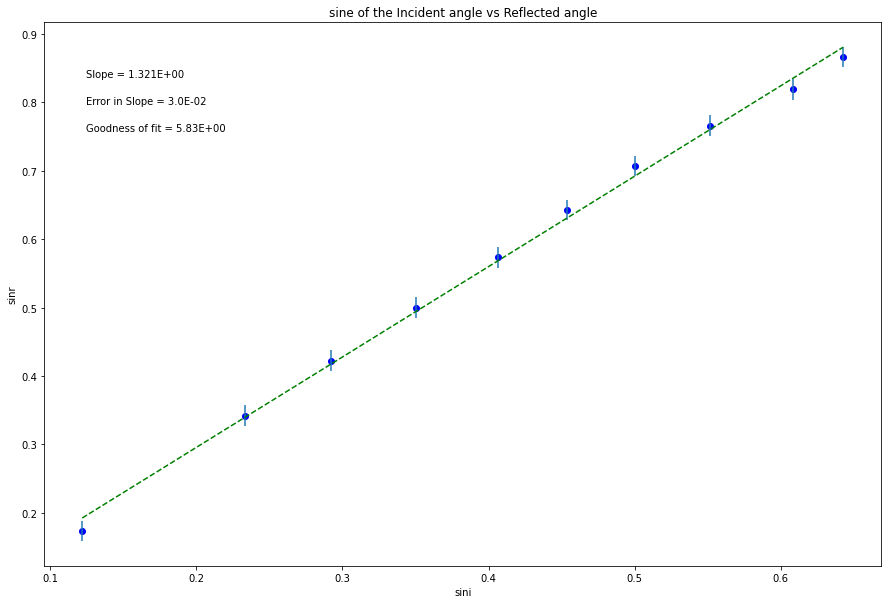

In [10]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
sinr=np.array([0.1218693954,0.233445462,0.2923718263,0.3502075249,0.4067368071,0.4539906797,0.5000001943,0.5519371943,0.6087616515,0.6427878389])
sini=np.array([0.1736482513,0.3420202839,0.4226184312,0.5000001943,0.5735766508,0.6427878389,0.7071070192,0.7660446835,0.8191522803,0.8660256282])


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_sinr = np.array([err, err, err, err, err, err, err, err, err, err])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

y = sini   #this should be the array you want to plot on the x axis
x = sinr
dy = err_sinr  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('sini')
plt.ylabel('sinr')
plt.title('sine of the Incident angle vs Reflected angle')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=3),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
